right now, this compares 9 channel CNN vs. GLMs, in terms of raw performance (cc^2 or cc), on ALL neurons (so no subset stuff yet)

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
from tang_jcompneuro.model_fitting_postprocess import load_data_generic

In [3]:
def check_all(squared, score_col_name):
    models_to_examine = [
        ('cnn', 'b.9'),
        ('cnn', 'b_bn.9'),
        ('cnn', 'b.10'),
        ('cnn', 'b.12'),
        ('cnn', 'b.15'),
        ('cnn', 'b.18'),
        ('cnn', '2l_k7d1_k3d1p1.7'),
        ('cnn', '2l_k5d1_k3d1p1.7'),
#         ('glm', 'fpower_softplus'),
        ('cnn', '2l_k5d2_k3d1p1.7'),
        ('cnn', '2l_k4d2_k3d1p1.7'),
    ] # TODO should make this a ordered dict.
      # so that it will be easier to collect best val model for each model class.
    
    return load_data_generic(models_to_examine, load_naive=False, metric='ccnorm_5', squared=squared,
                            score_col_name=score_col_name)

In [4]:
df_all_cc2 = check_all(squared=True, score_col_name='cc2').xs(100, level='percentage').sort_index()

MkA_Shape all
MkA_Shape OT
MkE2_Shape all
MkE2_Shape OT


In [5]:
# this is the way to change a multiindex's names.
# df_all.index.rename(['haha','haha2','haha3'], inplace=True)

In [6]:
# OT neurons. these numbers are little lower than Fig A.5 and Fig 6 of first submission. 
# as expected, due to previous model's overfitting.
df_all_cc2.apply(lambda x: x['cc2']['OT']['mean'], axis=1).unstack('subset')

subset                                             OT       all
dataset    model                                               
MkA_Shape  cnn_2l_k4d2_k3d1p1.7$False/False  0.497739  0.519880
           cnn_2l_k5d1_k3d1p1.7$False/False  0.488781  0.517351
           cnn_2l_k5d2_k3d1p1.7$False/False  0.497182  0.522709
           cnn_2l_k7d1_k3d1p1.7$False/False  0.495024  0.526322
           cnn_b.10$False/False              0.466594  0.508332
           cnn_b.12$False/False              0.474667  0.514160
           cnn_b.15$False/False              0.478522  0.516127
           cnn_b.18$False/False              0.479045  0.522733
           cnn_b.9$False/False               0.473150  0.507491
           cnn_b_bn.9$False/False            0.424929  0.445263
MkE2_Shape cnn_2l_k4d2_k3d1p1.7$False/False  0.535674  0.545667
           cnn_2l_k5d1_k3d1p1.7$False/False  0.537828  0.553052
           cnn_2l_k5d2_k3d1p1.7$False/False  0.522176  0.544316
           cnn_2l_k7d1_k3d1p1.7$False/False  0.535613  0.557072
           cnn_b.10$False/False              0.516914  0.542612
           cnn_b.12$False/False              0.524222  0.550695
           cnn_b.15$False/False              0.529842  0.552378
           cnn_b.18$False/False              0.529470  0.559645
           cnn_b.9$False/False               0.514725  0.540943
           cnn_b_bn.9$False/False            0.488121  0.499547

In [7]:
# HO neurons
df_all_cc2.apply(lambda x: x['cc2']['HO']['mean'], axis=1).unstack('subset')

subset                                             OT       all
dataset    model                                               
MkA_Shape  cnn_2l_k4d2_k3d1p1.7$False/False  0.246809  0.441707
           cnn_2l_k5d1_k3d1p1.7$False/False  0.241783  0.438452
           cnn_2l_k5d2_k3d1p1.7$False/False  0.239739  0.443920
           cnn_2l_k7d1_k3d1p1.7$False/False  0.245976  0.450182
           cnn_b.10$False/False              0.225049  0.423358
           cnn_b.12$False/False              0.231753  0.426111
           cnn_b.15$False/False              0.232534  0.433224
           cnn_b.18$False/False              0.238489  0.434912
           cnn_b.9$False/False               0.232761  0.424384
           cnn_b_bn.9$False/False            0.202916  0.344030
MkE2_Shape cnn_2l_k4d2_k3d1p1.7$False/False  0.248805  0.403088
           cnn_2l_k5d1_k3d1p1.7$False/False  0.254240  0.406536
           cnn_2l_k5d2_k3d1p1.7$False/False  0.242208  0.410119
           cnn_2l_k7d1_k3d1p1.7$False/False  0.253400  0.412075
           cnn_b.10$False/False              0.233190  0.398298
           cnn_b.12$False/False              0.236468  0.401814
           cnn_b.15$False/False              0.239626  0.403932
           cnn_b.18$False/False              0.239703  0.406568
           cnn_b.9$False/False               0.229838  0.396948
           cnn_b_bn.9$False/False            0.220538  0.334460

In [8]:
# ok. time to plot.
# this time I will only plot Monkey A,
# one for gqm.4 gaussian vs. poisson
# another for linear poisson vs softplus.

In [9]:
from tang_jcompneuro.plotting import image_subset_and_neuron_subset_list, show_one_basic

In [10]:
from tang_jcompneuro import dir_dictionary
import os.path

In [11]:
# magic numbers here follow
# https://github.com/leelabcnbc/tang_jcompneuro/blob/master/thesis_plots/v1_fitting/results_glm_opt_detailed.ipynb
def draw_one_stuff(monkey, model_name_x, model_name_y, save=None):
    assert model_name_x == 'B.9'
    # draw one by one.
    model_name_x_real = f'cnn_{model_name_x.lower()}$False/False'
    model_name_y_real = f'cnn_{model_name_y}$False/False'
    if model_name_y == '2l_k4d2_k3d1p1.7':
        model_name_y = '2L.7'
    num_panel = len(image_subset_and_neuron_subset_list)
    
    plt.close('all')
    fig, axes = plt.subplots(1, num_panel, sharex=True, sharey=True, squeeze=False,
                            figsize=(5.5,2.5))
    for idx, (ax, (img_subset, neuron_subset)) in enumerate(zip(axes.ravel(), image_subset_and_neuron_subset_list)):
        data_x = df_all_cc2.at[(monkey, img_subset, model_name_x_real), 'cc2'][neuron_subset]['raw']
        data_y = df_all_cc2.at[(monkey, img_subset, model_name_y_real), 'cc2'][neuron_subset]['raw']
        print(data_x.min(), data_x.max())
        print(data_y.min(), data_y.max())
        show_one_basic(data_x, data_y, title=f'{neuron_subset} neurons\n{img_subset} stimuli',
                      ax=ax,mean_title='mean $CC_\mathrm{norm}^2$', xlabel=model_name_x,
                      ylabel=model_name_y  if idx == 0 else None)
    monkey_title = {'MkA_Shape': 'A', 'MkE2_Shape': 'B'}[monkey]
    fig.suptitle(f'{model_name_y} vs. {model_name_x} on monkey {monkey_title}')
    # adjust figure 
    fig.subplots_adjust(top=0.75, bottom=0.175, left=0.1, right=0.98, hspace=0.1, wspace=0.075)
    
    if save is not None:
        save_dir = os.path.join(dir_dictionary['plots'], 'supp', 'cnn_different_arch')
        os.makedirs(save_dir, exist_ok=True)
        fig.savefig(os.path.join(save_dir, f'{save}.pdf'), dpi=300)
    
    plt.show()
    

0.00375188278074 1.0143110662
0.0145366097231 1.04958792852
0.00618595711386 0.86107714963
0.0190840674754 0.867015056731
0.00473971944384 0.83881373639
0.00428719117234 0.872470987358


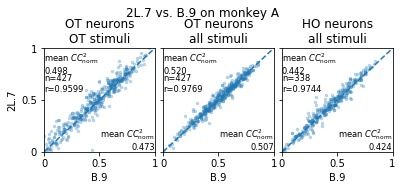

In [12]:
draw_one_stuff('MkA_Shape', 'B.9', '2l_k4d2_k3d1p1.7', 'base_vs_2l_A')

0.00621548681138 0.989269414271
0.0120551560909 1.0017064722
0.0343608653602 0.850459700304
0.0306776785274 0.869785773744
0.00499755238294 0.899931773829
0.0172585556769 0.911165206863


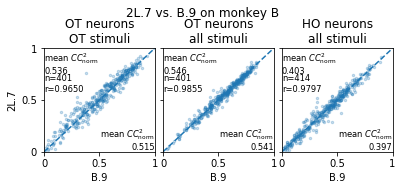

In [13]:
draw_one_stuff('MkE2_Shape', 'B.9', '2l_k4d2_k3d1p1.7', 'base_vs_2l_E2')

0.00375188278074 1.0143110662
0.00207009397554 0.880941342937
0.00618595711386 0.86107714963
0.0135416500722 0.790692895528
0.00473971944384 0.83881373639
0.00475508838341 0.78373370354


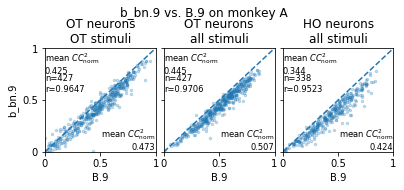

In [14]:
draw_one_stuff('MkA_Shape', 'B.9', 'b_bn.9', 'base_vs_baseBN_A')

0.00621548681138 0.989269414271
0.00545011817127 0.970894256635
0.0343608653602 0.850459700304
0.0291927664489 0.829252422162
0.00499755238294 0.899931773829
0.0124138753771 0.863518134161


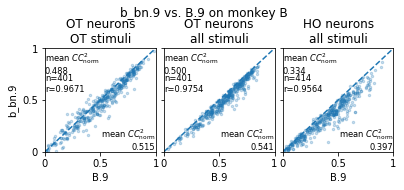

In [15]:
draw_one_stuff('MkE2_Shape', 'B.9', 'b_bn.9', 'base_vs_baseBN_E2')